<a href="https://colab.research.google.com/github/victor1cg/Python/blob/master/Lab4_NN_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

In this first part, we are going to see some useful techniques that are commonly used when training a Neural Network. \
We start by creating a dataset.

In [1]:
from sklearn.datasets import load_wine #load our target dataset
from sklearn.model_selection import train_test_split
import numpy as np

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 0.9, random_state = 123) 

We then create a MLP, as we did in the introductory part of Keras.

In [2]:
import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt

In [3]:
# Configuration options
#see the number of labels
labels = set(y_train)
print(labels, len(labels))

# Configuration options
feature_vector_length = X.shape[1] #how many features
num_classes = len(labels) #how many classes

{0, 1, 2} 3


In [4]:
#convert to one-hot encoding representation the ground truth
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
None


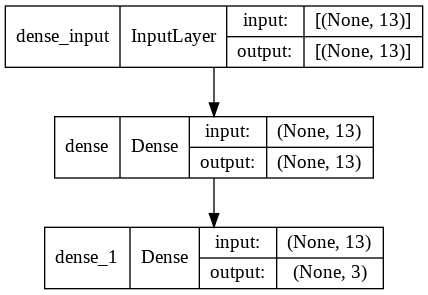

In [5]:
#IMPORTANT: add ALWAYS these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model.add(Dense(num_classes, activation='softmax')) #output layer
print(model.summary())
plot_model(model, show_shapes= True)

We now train our model. \
During our training, we use several *epochs*, meaning that our model see more times the same training samples. 

When using more epochs, it is important to look at the training curve, i.e., we print the loss (or accuracy) of both training and validation at the varying of the epochs. 

This plot can tell us a lot about the trained model, such as:


1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 


In [6]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric


#fit
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/5
15/15 [==============================] - 1s 12ms/step - loss: 6.3676 - accuracy: 0.3596 - val_loss: 1.0926 - val_accuracy: 0.6154
Epoch 2/5
15/15 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.4298 - val_loss: 1.0843 - val_accuracy: 0.6154
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 1.0922 - accuracy: 0.4298 - val_loss: 1.0755 - val_accuracy: 0.6154
Epoch 4/5
15/15 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.4298 - val_loss: 1.0703 - val_accuracy: 0.6154
Epoch 5/5
15/15 [==============================] - 0s 4ms/step - loss: 1.0871 - accuracy: 0.4298 - val_loss: 1.0636 - val_accuracy: 0.6154


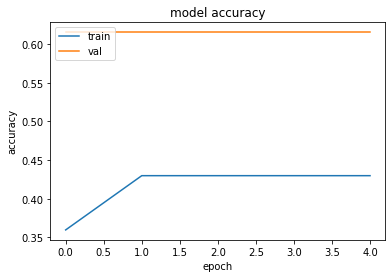

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

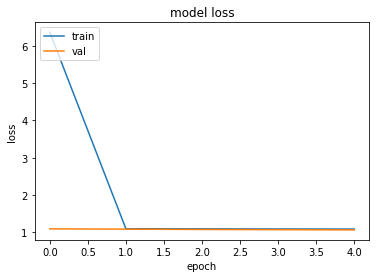

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

This is kind of a toy-sh dataset. /
Here, we see a clear pattern of the loss error: a rapid decreasing after the second epoch, and then the model already reached an equilibrium on its loss, i.e.g., the model does not improve its performance.
 

It is thus important to ask, how many epochs should we use? 
For example, right now we see that 2 epochs are enough. 
However, we trained our model for 5 epochs more. 
In this case, this was not time consuming, since each epoch took ~$1 ms$.
This might not be acceptable in more challenging task, where one epoch might least 1h, 1d, or even 1 week. 
We can save our time by introducing an **early stopping mechanism**. 
For example, during the training, if the model validation loss does not improve 
for 3 epochs, we decide to stop. 
In this way, we can even set the number of epochs to 10000. 


<a href = "https://keras.io/api/callbacks/early_stopping/"> [link] </a>

In [ ]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

#ALWAYS input this, to have the same results
np.random.seed(123)
set_random_seed(2)

model2 = Sequential() #we first define how the "model" looks like
model2.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model2.add(Dense(num_classes, activation='softmax')) #output layer

# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric


history2 = model2.fit(X_train, y_train_cat, epochs=500, batch_size=16, verbose=0, validation_split=0.1, callbacks=[es])

Epoch 00058: early stopping


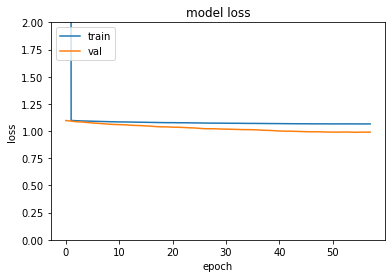

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 2)
plt.show()

# Exercise 1

In this first exercise, we are going to guide you through several NN experiments on a more challenging dataset. 

We start by creating a dataset. 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

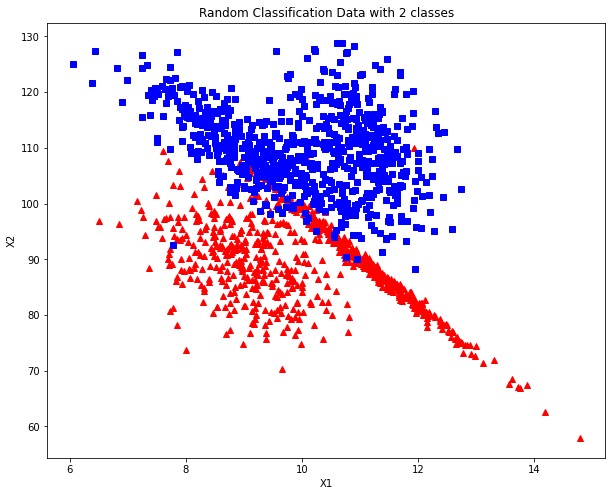

In [9]:
from sklearn import datasets
import numpy as np
np.random.seed(123)
X, y = datasets.make_classification(n_samples=1500, n_features=2, random_state=123, n_redundant= 0, scale=10, shift=10)
X[:, 0] = X[:, 0]*0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)


#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

## Ex1.1

Create a MLP called $model_1$ with two layers:

1.   one hidden layer with 5 neurons and relu as activation function. 
2.   one output layer.

Then, train it for 5 epochs, batch size = 16, and a validation set of 25%. 


In [10]:
## EX1.1 HERE

# Configuration options
feature_vector_length = 2 #how many features
num_classes = 2 #how many classes

In [11]:
# Create the model
model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model.add(Dense(num_classes, activation='softmax')) #output layer

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


# Ex 1.2

Plot both accuracy and loss curves with respect to the epoch number.

Answer the following:

1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 



In [ ]:
### Ex1.2 HERE

The loss curve tells us that the training improves only up to two epochs, but the validation accuracy, and to less extent the validation loss, is unstable. 

Let's see if we can improve the model in the next exercise. 

### Ex1.3

We move temporarily into an important aspect: *knowing our data*.
As we introduced in our last lesson, the goal of a good data scientist is not only to provide a good training model, but he / she needs to learn the data we are experimenting with. </br>
When working with a dataset, try to answer to the following:


1.   Is the ground truth balanced among the classes? In case of an unbalanced dataset, we need to be more careful on how we compute the performance. 
2.   What are the properties of the input features? For each feature, you can understand the following: i) is it defined in the discrete or continuous domain? if defined in the continous domain, How is it distributed? For example, print the minimum and maximum values for each feature.

Based on the answers, we can "improve" our training strategy. 




In [ ]:
### Ex1.3.1 HERE

The ground truth is completely balanced. Let's see how the features looks like. 

In [ ]:
### Ex1.3.2 HERE

Ok. This might be an issue for our training model. \
Remember, Neural Networks are trained with optimizers based on the gradient. 
This implies that the optimization might not be efficient when the features are not defined in the same range, since the we are using one learning rate to control the updates along features on different ranges.  


### Ex 1.4

We can try to now improve our model by scaling the features. Use a standard scaler to scale $X_{train}$ and $X_{test}$, create a new MLP $model_2$ and train it with the same configurations (architecure, training strategy) as done  for $model_1$. 

Then we'll do some plots to check the accuracy and loss of the latest model and finally compare it with the previous one (see below for details)


In [ ]:
### Ex1.4 HERE

Our second model gained an improvement in the validation accuracy (+5%), which is not bad at all given that we just did a simple preprocessing. \
But let us plot the accuracy on train and validation of our latest model with respect to the number of epochs. 

In [ ]:
# accuracy plot


Let's now plot the loss of our latest model on the train and validation sets. 

In [ ]:
# loss plot


Let's now compare the performance of the two models on the validation set. 

In [ ]:
# comparison of the loss of the two models on the validation set



The accuracy scores improve "regularly" using the scaled dataset. \
As we noticed in the original training, the model can still learn by increasing the number of epochs. \

# Ex1.5

Let's do it. \
For example, we can train a new MLP $model_3$ for 50 epochs. 
Print loss and accuracy curves, and then visually analyze them. \
Again, use the same configuration as $model_1$.


In [ ]:
# EX 1.5

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

In [ ]:
# summarize history for the loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The charts show some common training trends. For example, let's consider the loss:


1.   In the early stages (epoch 1 - 5), there is a phase where the model performance improve quickly. 
2.   From epoch 6 to 15, there is a stabilization trend, where the model improves at a lower rate, and it might seem that the training is almost done. Then there is a new phase of improvement. 
3.   After epoch 30, the loss does not improve much, and the loss decreases very slowly.

### Ex1.6

Define a fourth MLP $model_4$ with the early stopping mechanism with patience = 3. Use the same configuration of $model_1$.
Train the model for 500 epochs, and then plot the accuracy and loss curves.



In [ ]:
### Ex1.6 HERE

In [ ]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

We see that the model stopped at epoch 137. </br>

### Ex 1.6 

We created so far $4$ models, with four different training strategy, but the same MLP structure. \

We can now see what it would happen on the "real" life, i.e., if the fourth model is actually the best on the testing set as well. 
Remember: the fourth seems the best based on the validation accuracy and loss.

In [ ]:
### Ex1.6

### Ex1.7 

So far, when we defined a new model, we always "repeated" a set of instructions, like model definition (i.e., Sequential, add Dense layers, compile). \

It's time to speed-up this process. 
Create a function that, given the number of layers, creates a MLP. 
Here, we set the number of neurons to 2 for all hidden layers, and activaiton function as relu. The output layer's number of neurons depend on the number of classes we use, while the activation function is a softmax. 

In [ ]:
### Ex1.7

def MLP_definer(n_layers, input_size, n_classes, activation_f):
  

# Ex 1.8 

Let's now consider the number of layers (not counting the input and output ones) of the network as a hyperparameter. 

Using the function you just defined in the previous exercise, implement a grid-search among different number of layers (from 0 to 4). \
Remember to use the earlystopping mechanism. \
Print both training and validation accuracies.
Any comment?

In [ ]:
# Exercise 1.8

# Ex 2

In this new exercise, it's time to be more independent from us. \
Consider the *wine_dataset*, can you improve the model performance?

Adopt the tips we saw in this lecture. \

Remember: use the testing set only *at the end*, when you selected the best model. 


In [ ]:
#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 